In [1]:
import random
import gym
import numpy as np
import pickle, os

In [2]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [3]:
env = gym.make('Taxi-v3', render_mode='ansi')
env

<TimeLimit<OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<TaxiEnv<Taxi-v3>>>>>>

In [4]:
state = env.reset()
state

392

In [5]:
env.observation_space.n

500

In [6]:
print(env.render())

['+---------+\n|\x1bR\x1b: | : :G|\n| : | : : |\n| : : : : |\n| | : | :\x1b \x1b|\n|Y| : |\x1bB\x1b: |\n+---------+\n\n']


In [7]:
env = gym.make('Taxi-v3', render_mode = 'ansi')
env.reset()


161

In [8]:
!apt-get install x11-utils > /dev/null 2>&1
!pip install pyglet > /dev/null 2>&1
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [9]:
env = gym.make("Taxi-v3").env

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [11]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [13]:
!apt-get install -y xvfb
!pip install pyvirtualdisplay


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libxfont2 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils xserver-common
The following NEW packages will be installed:
  libxfont2 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils xserver-common xvfb
0 upgraded, 7 newly installed, 0 to remove and 19 not upgraded.
Need to get 7,728 kB of archives.
After this operation, 11.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 xfonts-encodings all 1:1.0.5-0ubuntu2 [578 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 xfonts-utils amd64 1:7.7+6build2 [94.6 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/main amd64 xfonts-base a

In [14]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

In [15]:
!python -m pip install pygame

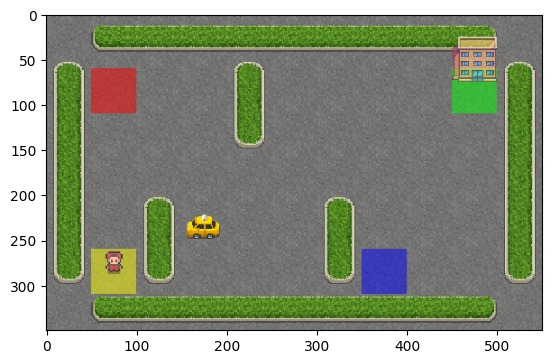

In [16]:
env.reset()
prev_screen = env.render(mode = 'rgb_array')
plt.imshow(prev_screen)

for i in range(50):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  screen = env.render(mode = 'rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait = True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

  ipythondisplay.clear_output(wait = True)
  env.close()

  ipythondisplay.clear_output(wait = True)
  env.close()

In [17]:
print("Action Space{}".format(env.action_space))
print("State Space{}".format(env.observation_space))
state = env.encode(3, 1, 2, 0)
print("State:", state)
env.s = state

Action SpaceDiscrete(6)
State SpaceDiscrete(500)
State: 328


In [18]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [19]:
env.s = 328
epochs = 0
penalties, reward = 0, 0
frames = []
done = False
while not done:
  action = env.action_space.sample()
  state, reward, done, info = env.step(action)

  if reward == -10:
    penalties += 1

  frames.append({
      'frame': env.render(mode='ansi'),
      'state' : state,
      'action' : action,
      'reward' : reward
  })

  epochs += 1

  print("Timesteps taken: {}".format(epochs))
  print("Penalties incurred: {}".format(penalties))

Timesteps taken: 1
Penalties incurred: 0
Timesteps taken: 2
Penalties incurred: 1
Timesteps taken: 3
Penalties incurred: 1
Timesteps taken: 4
Penalties incurred: 1
Timesteps taken: 5
Penalties incurred: 1
Timesteps taken: 6
Penalties incurred: 1
Timesteps taken: 7
Penalties incurred: 1
Timesteps taken: 8
Penalties incurred: 2
Timesteps taken: 9
Penalties incurred: 2
Timesteps taken: 10
Penalties incurred: 3
Timesteps taken: 11
Penalties incurred: 4
Timesteps taken: 12
Penalties incurred: 4
Timesteps taken: 13
Penalties incurred: 4
Timesteps taken: 14
Penalties incurred: 5
Timesteps taken: 15
Penalties incurred: 5
Timesteps taken: 16
Penalties incurred: 6
Timesteps taken: 17
Penalties incurred: 6
Timesteps taken: 18
Penalties incurred: 6
Timesteps taken: 19
Penalties incurred: 7
Timesteps taken: 20
Penalties incurred: 8
Timesteps taken: 21
Penalties incurred: 9
Timesteps taken: 22
Penalties incurred: 9
Timesteps taken: 23
Penalties incurred: 9
Timesteps taken: 24
Penalties incurred: 9
T

In [20]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
  for i, frame in enumerate(frames):
    clear_output(wait = True)
    print(frame['frame'])
    print(f"Timestep: {i + 1}")
    print(f"State: {frame['state']}")
    print(f"Action: {frame['action']}")
    print(f"Reward: {frame['reward']}")
    sleep(.1)
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 1159
State: 85
Action: 5
Reward: 20


In [21]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [22]:
%%time

  import random
  from IPython.display import clear_output

  alpha = 0.1
  gamma = 0.6
  epsilon = 0.1

  all_epochs = []
  all_penalties = []

  for i in range(1, 100001):
    state = env.reset()

    epochs, penalties, reward, = 0, 1, 0
    done = False
    while not done:
      if random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
      else:
        action = np.argmax(q_table[state])

      next_state, reward, done, info = env.step(action)
      old_value = q_table[state, action]
      next_max = np.max(q_table[next_state])

      new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
      q_table[state, action] = new_value
      if reward == -10:
        penalties += 1

      state = next_state
      epochs += 1

    if i % 100 == 0:
      clear_output(wait = True)
      print(f"Episode: {i}")

print("Training finished.\n")

Episode: 100000
Training finished.

CPU times: user 1min 11s, sys: 8.08 s, total: 1min 19s
Wall time: 1min 16s


In [23]:
q_table[328]

array([-2.40117492, -2.27325184, -2.41199406, -2.35934652, -9.94974989,
       -9.20785966])

In [24]:
total_epochs, total_penalities = 1, 1
episodes = 100

for _ in range(episodes):
  state = env.reset()
  epochs, penalties, reward = 0, 1, 0

  done = False
  while not done:
    action = np.argmax(q_table[state])
    state, reward, done, info = env.step(action)

    if reward ==  -10:
      penalties += 1

      epochs += 1

    total_penalities += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalities / episodes}")

Results after 100 episodes:
Average timesteps per episode: 0.01
Average penalties per episode: 13.29


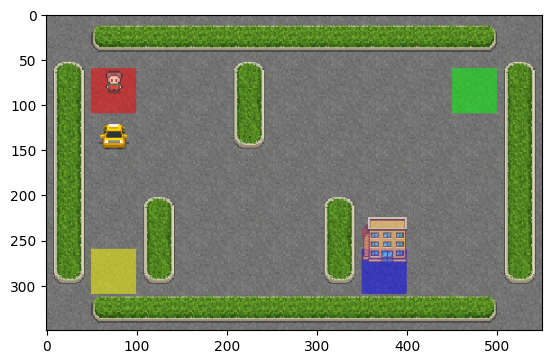

In [25]:
env.reset()
prev_screen = env.render(mode = 'rgb_array')
plt.imshow(prev_screen)

for _ in range(episodes):
  action = env.action_space.sample()
  state, penalty, done, info = env.step(action)
  screen = env.render(mode = 'rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait = True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

ipythondisplay.clear_output(wait = True)
env.close()

ipythondisplay.clear_output(wait = True)
env.close()

